In [1]:
import os, sys, time
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from importlib import reload

import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import silhouette_samples, silhouette_score

import common
import DimensionalityReduction.DimensionalityReductionDatasets as dr_datasets
from data.faces.faces_data import get_faces_dataset, get_faces_dataset_with_all_labels

title_fontsize = 24
fontsize = 24
legend_fontsize = 18
default_figure_size = (15, 8)

DATASET = "Faces"

/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/pandas/core/frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [2]:
filenames_train, filenames_test, X_train_faces, X_test_faces, y_train_faces, y_test_faces =\
get_faces_dataset_with_all_labels()

reload(dr_datasets)
random_faces, _ = dr_datasets.get_faces_random_projection()

In [3]:
reload(common)
n = random_faces.shape[1]
distortions, davies_bouldin_scores, silhouette_scores, calinski_harabasz_scores, times =\
common.compute_kmeans_scores(random_faces, n)

For n_clusters = 2 average silhouette_score: 0.07713179251289969 time taken: 0.1269083023071289s
For n_clusters = 3 average silhouette_score: 0.052314295541113866 time taken: 0.1360454559326172s
For n_clusters = 4 average silhouette_score: 0.044290025998975587 time taken: 0.30149316787719727s
For n_clusters = 5 average silhouette_score: 0.03897140217613303 time taken: 0.3165295124053955s
For n_clusters = 6 average silhouette_score: 0.036920069086556574 time taken: 0.28565526008605957s
For n_clusters = 7 average silhouette_score: 0.023734968840966948 time taken: 0.3184316158294678s
For n_clusters = 8 average silhouette_score: 0.027972092433467363 time taken: 0.8088386058807373s
For n_clusters = 9 average silhouette_score: 0.021179408337697107 time taken: 0.30875134468078613s
For n_clusters = 10 average silhouette_score: 0.02112324262637195 time taken: 0.5454366207122803s
For n_clusters = 11 average silhouette_score: 0.01869482064628019 time taken: 0.3163180351257324s
For n_clusters = 12

For n_clusters = 86 average silhouette_score: 0.007342156402717231 time taken: 13.671766519546509s
For n_clusters = 87 average silhouette_score: 0.0062770544607544335 time taken: 12.206170320510864s
For n_clusters = 88 average silhouette_score: 0.00640360017936027 time taken: 13.878596067428589s
For n_clusters = 89 average silhouette_score: 0.00752025075689018 time taken: 14.449210166931152s
For n_clusters = 90 average silhouette_score: 0.0064052377149225745 time taken: 12.18233585357666s
For n_clusters = 91 average silhouette_score: 0.007373839976630038 time taken: 12.35777235031128s
For n_clusters = 92 average silhouette_score: 0.006760351975047263 time taken: 12.066694021224976s
For n_clusters = 93 average silhouette_score: 0.0049950597929226005 time taken: 12.708813190460205s
For n_clusters = 94 average silhouette_score: 0.008030632390684243 time taken: 13.503495454788208s
For n_clusters = 95 average silhouette_score: 0.007404421735390905 time taken: 10.779221296310425s
For n_clust

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


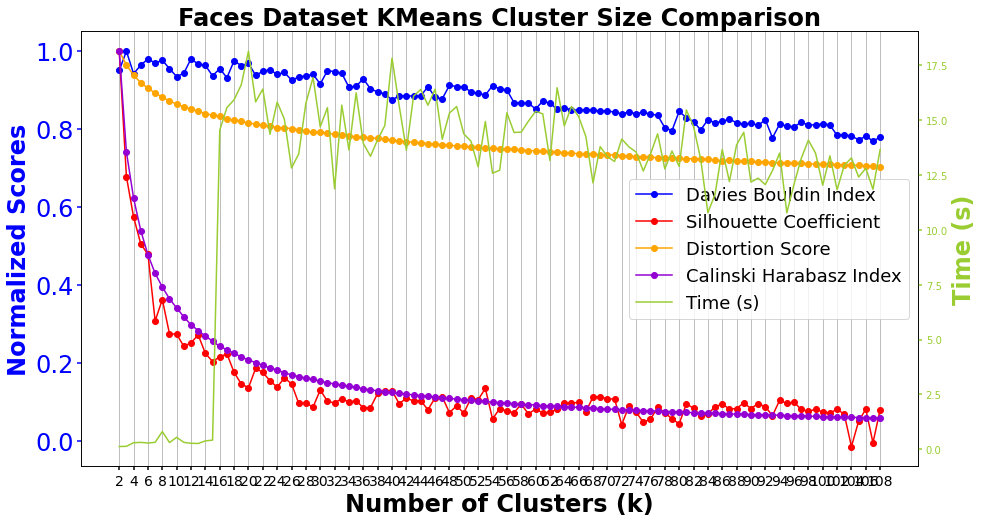

In [53]:
common.plot_kmeans_all(distortions, davies_bouldin_scores, silhouette_scores, calinski_harabasz_scores, times, DATASET)

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:109: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


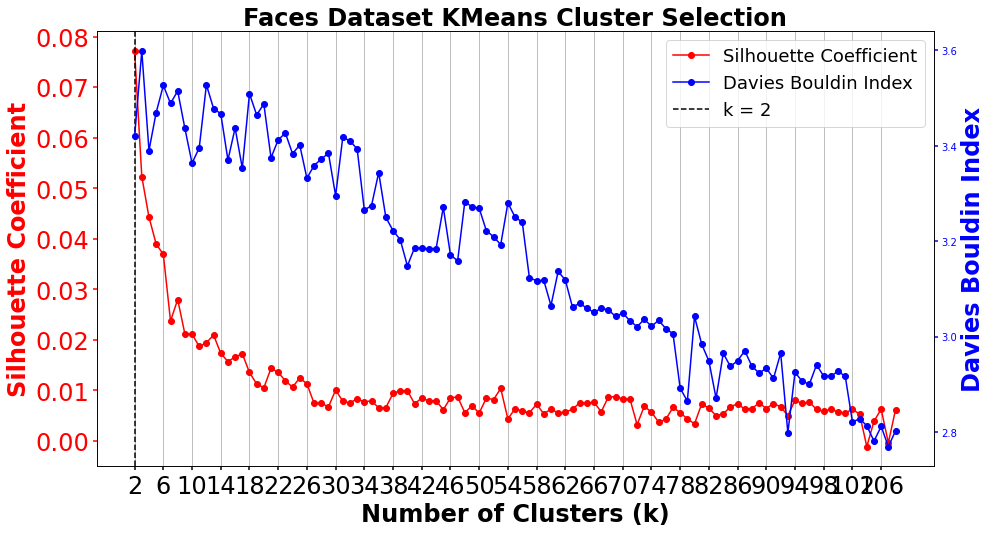

In [54]:
reload(common)
best_k = 2
common.plot_kmeans_selection(davies_bouldin_scores, silhouette_scores, best_k=best_k, DATASET=DATASET)

For n_clusters = 2 average silhouette_score: 0.07713179251289969 time taken: 0.23088955879211426s


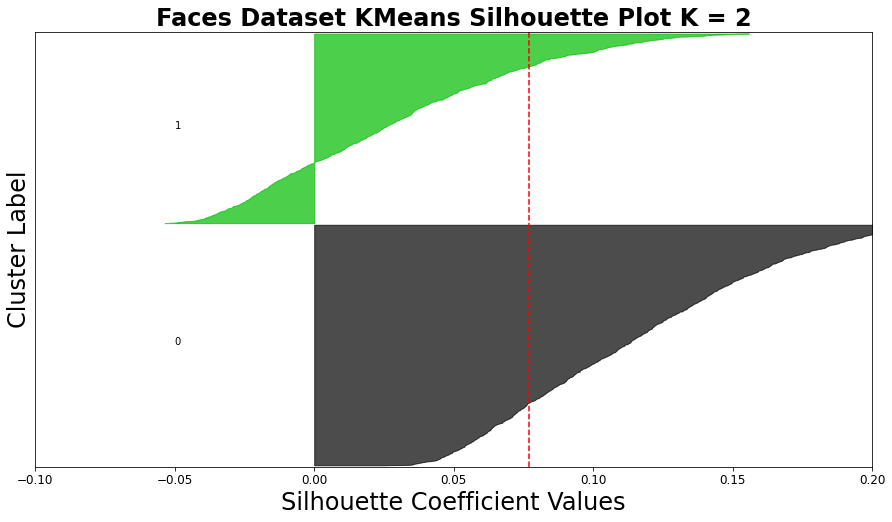

In [55]:
reload(common)
common.plot_silhouette_kmeans(random_faces, best_k, DATASET, xlim=[-0.1, 0.2])

In [56]:
start_time = time.time()
km = KMeans(n_clusters=best_k, **common.km_arguements)
km.fit(random_faces)
end_time = time.time()
print("Time Taken {} s".format(end_time - start_time))
y_train_faces['km_labels']=km.labels_
random_faces_km = pd.DataFrame(random_faces.copy())
random_faces_km['km_labels'] = km.labels_
random_faces_km['sex'] = y_train_faces['sex']

print("homogeneity_score sex: ", homogeneity_score(km.labels_, y_train_faces['sex']))
print("homogeneity_score race: ", homogeneity_score(km.labels_, y_train_faces['race']))
print("Silhouette Score: {}".format(silhouette_score(random_faces, km.labels_)))

Time Taken 0.20299029350280762 s
homogeneity_score sex:  7.575596912261391e-06
homogeneity_score race:  0.0009879534468363322
Silhouette Score: 0.07713179251289969


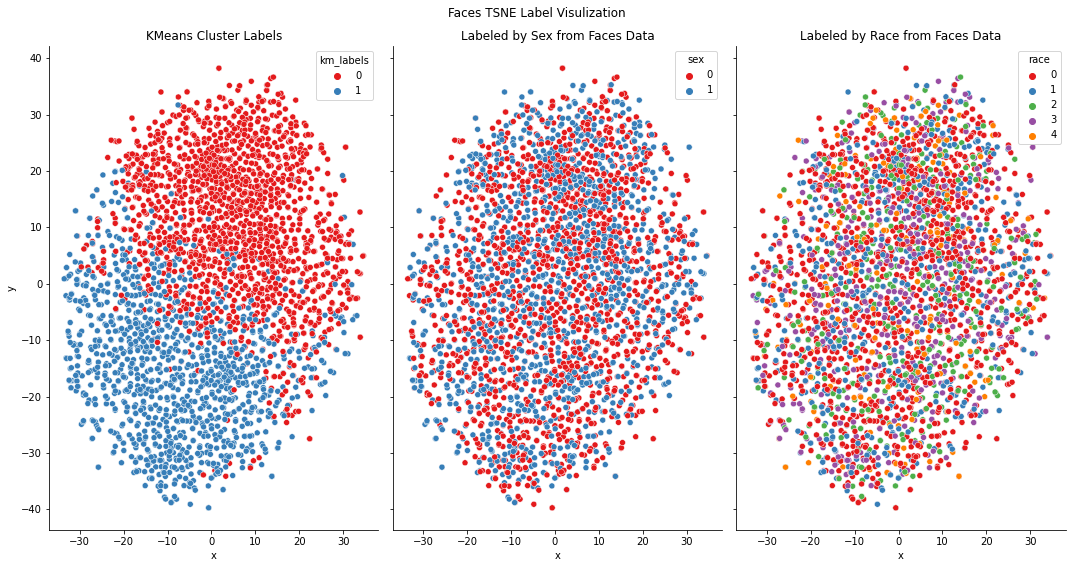

In [8]:
# Create a t-SNE model with learning rate 50
m = TSNE(perplexity=30, learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(random_faces)
y_train_faces['x'] = tsne_features[:,0]
y_train_faces['y'] = tsne_features[:,1]

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=True, figsize=default_figure_size, sharey=True)

sns.scatterplot(x="x", y="y", hue="km_labels", data=y_train_faces, palette="Set1", ax=ax1)
sns.scatterplot(x="x", y="y", hue="sex", data=y_train_faces, palette="Set1", ax=ax2)
sns.scatterplot(x="x", y="y", hue="race", data=y_train_faces, palette="Set1", ax=ax3)

fig.suptitle("{} TSNE Label Visulization".format(DATASET))
ax1.set_title("KMeans Cluster Labels")
ax2.set_title("Labeled by Sex from Faces Data")
ax3.set_title("Labeled by Race from Faces Data")
sns.despine(fig)
plt.tight_layout()

plt.show()

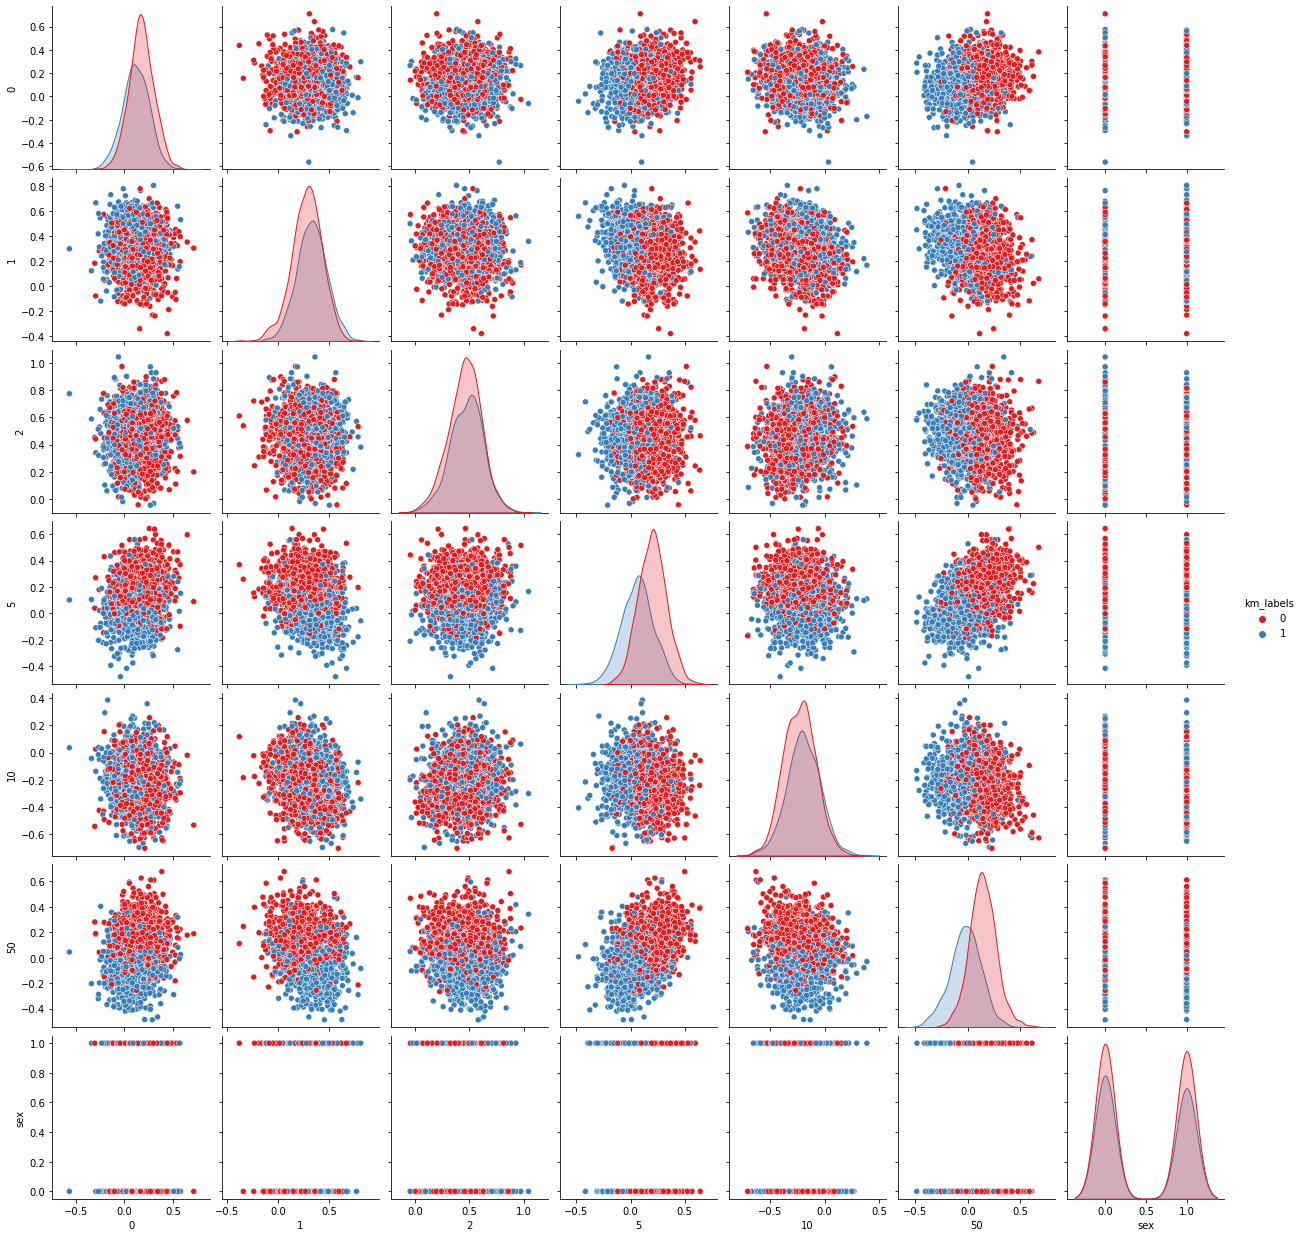

In [52]:
sns.pairplot(random_faces_km[[0, 1, 2, 5, 10, 50, 'sex', "km_labels"]], hue="km_labels", palette="Set1")

# Expectation Maximization

In [10]:
reload(common)
em_n = random_faces.shape[1]
n_components = np.arange(2, em_n)
davies_bouldin_scores_em, silhouette_scores_em, bic_scores_em, aic_scores_em, times_em =\
common.compute_em_scores(random_faces, em_n)

For n_clusters = 2 average silhouette_score: 0.06344472686778867 time taken: 1.2146146297454834s
For n_clusters = 3 average silhouette_score: 0.02680115276559114 time taken: 2.90311598777771s
For n_clusters = 4 average silhouette_score: 0.029148731973535544 time taken: 2.360239028930664s
For n_clusters = 5 average silhouette_score: 0.028107673382170992 time taken: 1.4676196575164795s
For n_clusters = 6 average silhouette_score: 0.027444147602998785 time taken: 1.064436435699463s
For n_clusters = 7 average silhouette_score: 0.023757284199767983 time taken: 1.4166367053985596s
For n_clusters = 8 average silhouette_score: 0.016406108845734714 time taken: 1.5236237049102783s
For n_clusters = 9 average silhouette_score: 0.021981413543958103 time taken: 1.267336368560791s
For n_clusters = 10 average silhouette_score: 0.014121371782026222 time taken: 1.4150142669677734s
For n_clusters = 11 average silhouette_score: 0.021543458526964536 time taken: 1.618544578552246s
For n_clusters = 12 averag

For n_clusters = 86 average silhouette_score: 0.0005804324238623517 time taken: 2.6910808086395264s
For n_clusters = 87 average silhouette_score: 0.0011760707807443869 time taken: 2.6823651790618896s
For n_clusters = 88 average silhouette_score: -0.0004632888594925351 time taken: 2.558786153793335s
For n_clusters = 89 average silhouette_score: -0.0013315948635463928 time taken: 2.5288050174713135s
For n_clusters = 90 average silhouette_score: -0.0010247232607002554 time taken: 2.6616756916046143s
For n_clusters = 91 average silhouette_score: 0.0016623230981840972 time taken: 3.1227550506591797s
For n_clusters = 92 average silhouette_score: 0.0011435665927749684 time taken: 2.836172103881836s
For n_clusters = 93 average silhouette_score: 0.00025384778506122634 time taken: 2.7115416526794434s
For n_clusters = 94 average silhouette_score: 0.0011421205946830827 time taken: 2.688098192214966s
For n_clusters = 95 average silhouette_score: 0.0022012009587320464 time taken: 3.1717262268066406s

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:250: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


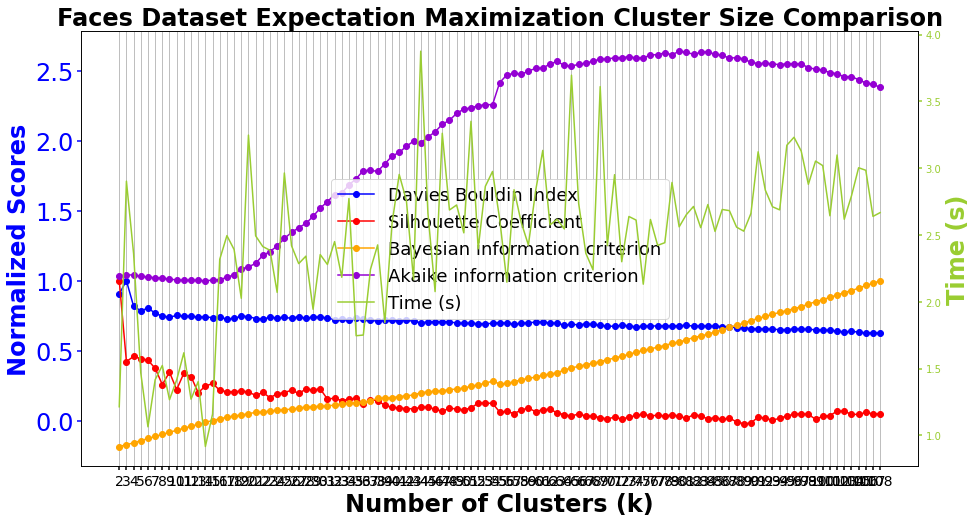

In [11]:
reload(common)
common.plot_em_all(davies_bouldin_scores_em, silhouette_scores_em, bic_scores_em, aic_scores_em, times_em, DATASET)

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:301: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


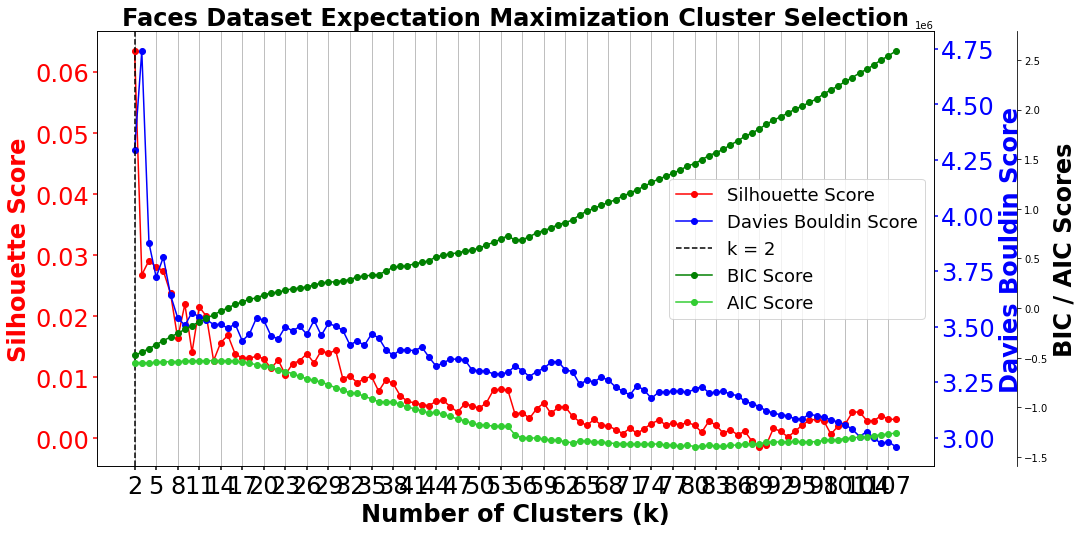

In [43]:
reload(common)
best_k = 2
common.plot_em_selection(davies_bouldin_scores_em, silhouette_scores_em, bic_scores_em, aic_scores_em, best_k, DATASET, tick_spacing=3)

For n_clusters = 2 average silhouette_score: 0.06344472686778867 time taken: 1.4325895309448242s


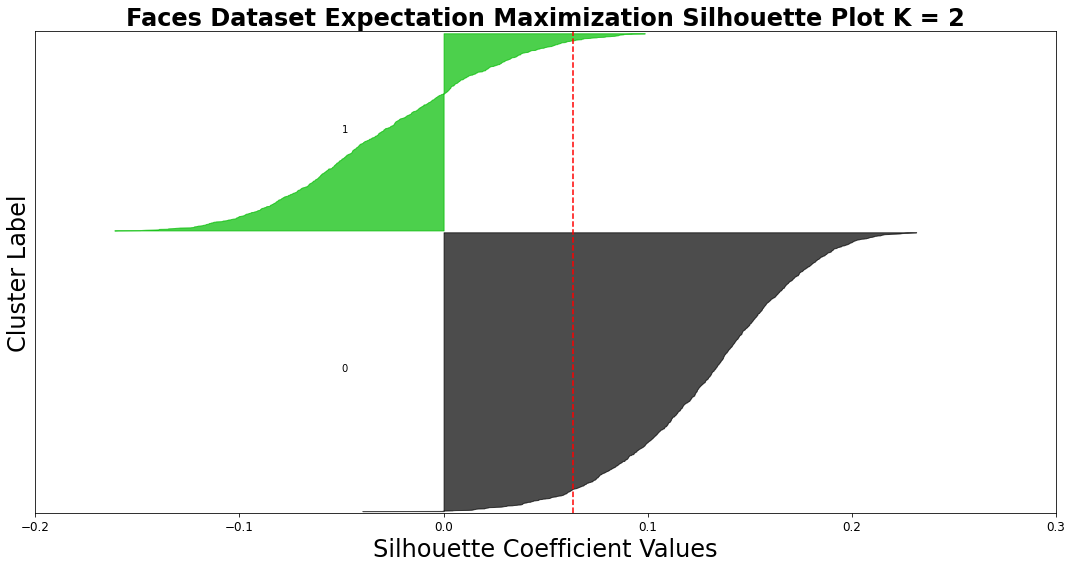

In [44]:
reload(common)
best_k=2
common.plot_silhouette_em(random_faces, best_k, DATASET, xlim=[-0.2, 0.3])

In [49]:
start_time = time.time()
em_model = GaussianMixture(best_k, covariance_type='full', random_state=42)
em_model.fit(random_faces)
end_time = time.time()
print("time taken {} s".format(end_time-start_time))
y_train_faces['em_labels']=em_model.predict(random_faces)
random_faces_gm = pd.DataFrame(random_faces.copy())
random_faces_gm['em_labels'] = em_model.predict(random_faces)
random_faces_gm['sex'] = y_train_faces['sex']

print("homogeneity_score sex: ", homogeneity_score(em_model.predict(random_faces), y_train_faces['sex']))
print("homogeneity_score race: ", homogeneity_score(em_model.predict(random_faces), y_train_faces['race']))
print("Silhouette Score: {}".format(silhouette_score(random_faces, em_model.predict(random_faces))))

time taken 0.8822159767150879 s
homogeneity_score sex:  1.0761864471681548e-05
homogeneity_score race:  0.0013095702544470827
Silhouette Score: 0.06440431483373506


In [46]:
# Create a t-SNE model with learning rate 50
m = TSNE(perplexity=30, learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(random_faces)
y_train_faces['x'] = tsne_features[:,0]
y_train_faces['y'] = tsne_features[:,1]

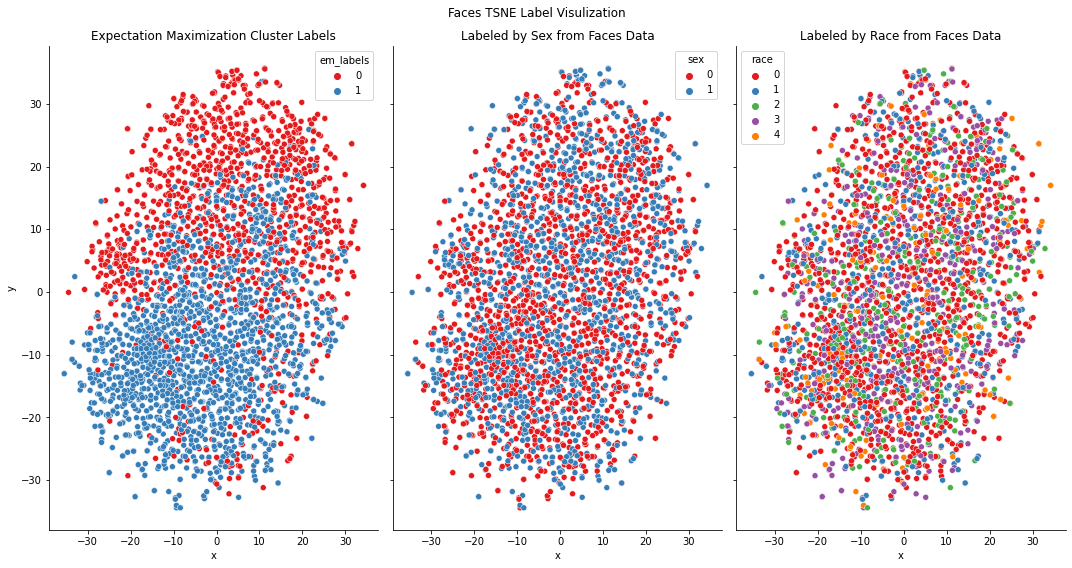

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=True, figsize=default_figure_size, sharey=True)

sns.scatterplot(x="x", y="y", hue="em_labels", data=y_train_faces, palette="Set1", ax=ax1)
sns.scatterplot(x="x", y="y", hue="sex", data=y_train_faces, palette="Set1", ax=ax2)
sns.scatterplot(x="x", y="y", hue="race", data=y_train_faces, palette="Set1", ax=ax3)

fig.suptitle("{} TSNE Label Visulization".format(DATASET))
ax1.set_title("Expectation Maximization Cluster Labels")
ax2.set_title("Labeled by Sex from Faces Data")
ax3.set_title("Labeled by Race from Faces Data")
sns.despine(fig)
plt.tight_layout()

plt.show()

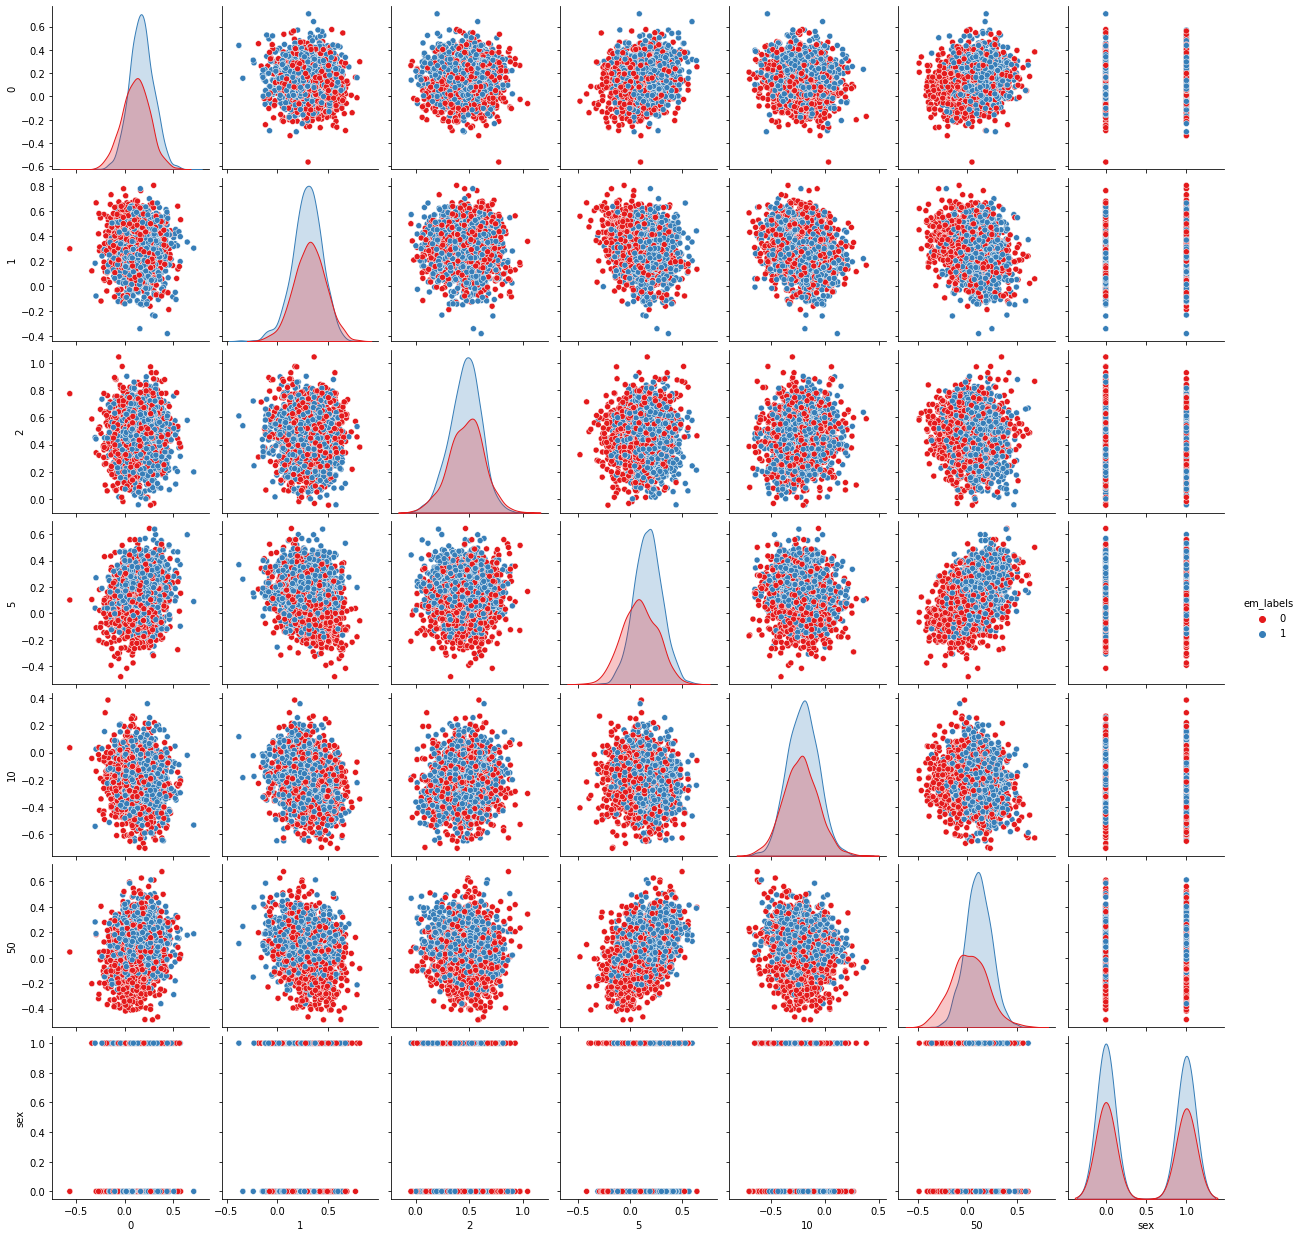

In [50]:
sns.pairplot(random_faces_gm[[0, 1, 2, 5, 10, 50, 'sex', "em_labels"]], hue="em_labels", palette="Set1")